## Introduction

##### $\rightarrow$ In this notebook we will explore the regression models on education inequality data. We have already cleaned the data and normalized it in another notebook, so now we will do analysis on what effects the ACT score the most based off of the data we have.

## Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Import additional libraries

## Load clean data

In [2]:
act_train = pd.read_csv('https://github.com/nitschels/EdGap-Education/raw/main/act_train.csv')
act_test = pd.read_csv('https://github.com/nitschels/EdGap-Education/raw/main/act_test.csv')

In [3]:
feature_train = pd.read_csv('https://github.com/nitschels/EdGap-Education/raw/main/feature_train.csv')
feature_test = pd.read_csv('https://github.com/nitschels/EdGap-Education/raw/main/feature_test.csv')

##### $\rightarrow$ We will now review the contents of the data set

In [4]:
print(act_train.shape,
act_test.shape,
feature_train.shape,
feature_test.shape)

(6768, 1) (1693, 1) (6768, 13) (1693, 13)


Notice we have the shape for all of our training data should have the same x value and the test data should have the same x value. This is true as desired

## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ Which factor is the best predictor for ACT scores?
##### $\rightarrow$ Does State and Local funding affect the quality of education?
##### $\rightarrow$ How accurate is our predictor for the ACT score?

## Analysis

In [5]:
num_vars = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'federal_funding', 'state_local_funding']

We will load the variables we wish to do regression analysis on.

In [6]:
X = np.hstack((np.ones_like(act_train), feature_train[num_vars]))

First, we take an X variable that adds a column to solve for the y-intercept

In [7]:
train_x = np.matmul(X.T,X)
inv_train = np.linalg.inv(train_x)

In [8]:
train_y = np.matmul(X.T, act_train)

In [9]:
np.matmul(inv_train,train_y)

,average_act
0,20.182792
1,-0.135214
2,0.296574
3,0.000418
4,0.003536
5,-1.700678
6,-0.419326
7,-0.168894


Using numpy linear algebra techniques, we have found our β values for the regression

In [10]:
beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, act_train))
print(beta)

   average_act
0    20.182792
1    -0.135214
2     0.296574
3     0.000418
4     0.003536
5    -1.700678
6    -0.419326
7    -0.168894


In [11]:
beta, _, _, _ = np.linalg.lstsq(X, act_train)
print(beta)

[[ 2.01827916e+01]
 [-1.35213876e-01]
 [ 2.96574231e-01]
 [ 4.18384021e-04]
 [ 3.53596721e-03]
 [-1.70067834e+00]
 [-4.19326313e-01]
 [-1.68893850e-01]]


<ipython-input-11-2ab47c739c7c>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta, _, _, _ = np.linalg.lstsq(X, act_train)


This plot shows all of the test data plotted with a line of fit going through it, however, this is not what we are testing.

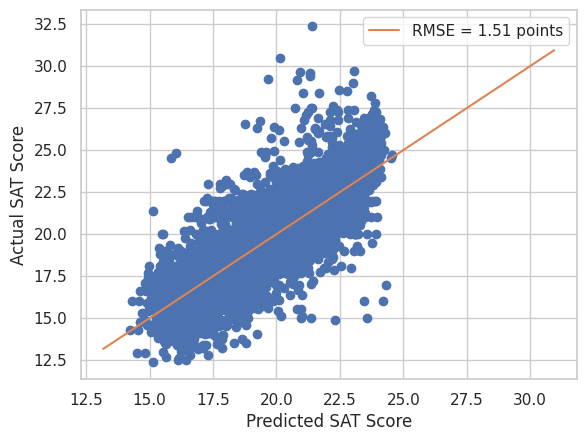

In [12]:
y_pred = np.matmul(X, beta)
one = np.linspace(act_test.min(), act_test.max(), 100)
rmse = np.sqrt(np.mean((y_pred - act_train)**2))

fig, ax = plt.subplots()
ax.plot(y_pred, act_train, 'o')
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f} points")
ax.set_xlabel("Predicted SAT Score")
ax.set_ylabel("Actual SAT Score")
ax.legend()

In [13]:
for feature_name, coeff in zip(feature_test[num_vars].columns, beta.squeeze()[1:]):
  print(f"{feature_name}: {coeff:.4f}")

rate_unemployment: -0.1352
percent_college: 0.2966
percent_married: 0.0004
median_income: 0.0035
percent_lunch: -1.7007
federal_funding: -0.4193
state_local_funding: -0.1689


In [20]:
rf_reg = RandomForestRegressor(n_estimators=100).fit(feature_train[num_vars], act_train)
y_pred_test = rf_reg.predict(feature_test[num_vars])
y_pred_train = rf_reg.predict(feature_train[num_vars])

<ipython-input-20-b494110ebf64>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg = RandomForestRegressor(n_estimators=100).fit(feature_train[num_vars], act_train)


In [24]:
y_pred_train.shape

(6768,)

In [25]:
act_test.shape

(1693, 1)

In [32]:
act_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   average_act  1693 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


In [33]:
act_test_list = act_test['average_act']

In [35]:
act_test_list.shape

(1693,)

In [37]:
act_train_list = act_train['average_act']

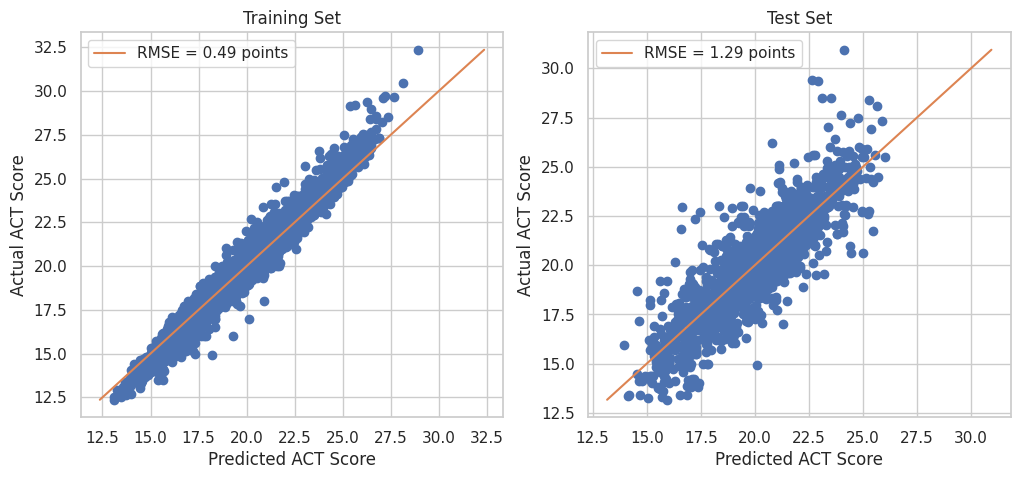

In [39]:
one_train = np.linspace(act_train.min(), act_train.max(), 100)
one_test = np.linspace(act_test.min(), act_test.max(), 100)
rmse_test = np.sqrt(np.mean((y_pred_test - act_test_list)**2))
rmse_train = np.sqrt(np.mean((y_pred_train - act_train_list)**2))

fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_pred_train, act_train, 'o')
ax1.plot(one_train, one_train, '-', label=f"RMSE = {rmse_train:.2f} points")
ax1.set_title("Training Set")
ax1.set_xlabel("Predicted ACT Score")
ax1.set_ylabel("Actual ACT Score")
ax1.legend()

ax2.plot(y_pred_test, act_test, 'o')
ax2.plot(one_test, one_test, '-', label=f"RMSE = {rmse_test:.2f} points")
ax2.legend()
ax2.set_title("Test Set")
ax2.set_xlabel("Predicted ACT Score")
ax2.set_ylabel("Actual ACT Score")
fig.set_size_inches(12, 5)

## Conclusion

Our beta values for the data show that there is a strong negative correlation between the percent of students at a school that receive lunch for free or reduced rate and ACT scores (-1.7007). This means that it is our best predictor for the ACT score, meaning that schools with a higher percentage in this category tend to perform worse on the test. Furthermore, the schools with higher percentage of students going to college are predicted to have higher scores on the test. This can be interpreted as students who wish to go to college may have more resources to study for the test since to get into a better school, higher ACT scores are desired.

Federal funding is shown to have the second lowest negative correlation (-0.4193). State and local funding have a negative correlation as well (-0.1689), however not as much as at the federal level. We can interpret this as states who already have low education levels, and therefore lower standardized testing scores, will recieve more funding from the government for them to "catch up", in a sense, to the rest of the country on the education front.

Key figures and Observations:

RMSE (training) = 0.49

RMSE (test) = 1.29

These can be interpreted as such since the regression line is based off of the training data and then fit to the test data in order to see how accurate it is
An RMSE of 1.29 shows that our regression line is a good fit, but not perfect because we are looking for as little of a difference as possible between the two
